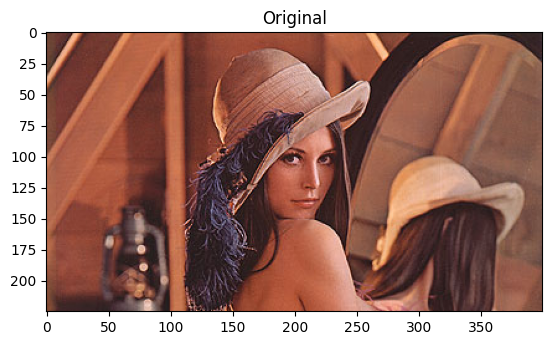

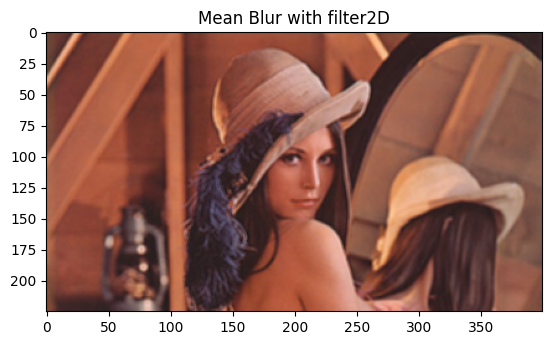

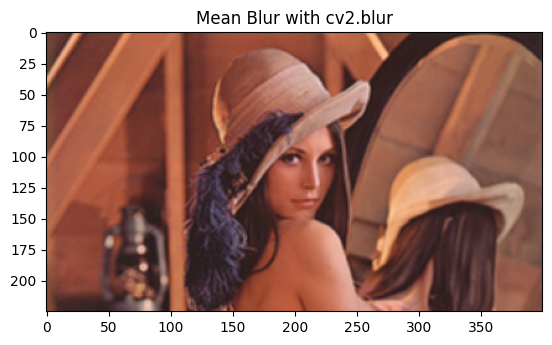

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgBGR = cv2.imread('images/lena.jpg')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.imshow(imgRGB)
plt.title('Original')
plt.show()

kernel = np.array([[1,1,1], [1,1,1], [1,1,1]]) / 9

dst1 = cv2.filter2D(imgRGB, -1, kernel)

plt.imshow(dst1)
plt.title('Mean Blur with filter2D')
plt.show()

dst2= cv2.blur(imgRGB, (3,3))
plt.imshow(dst2)
plt.title('Mean Blur with cv2.blur')
plt.show()

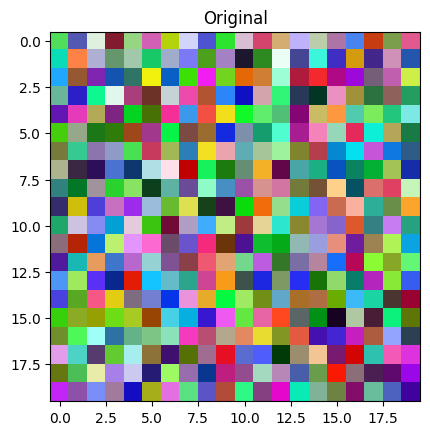

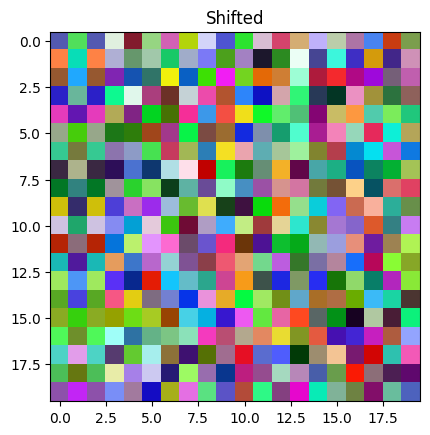

In [3]:
#Shift pixels by one

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.random.randint(0,255, size=[20,20,3], dtype='uint8')

kernel=np.array([[0,0,0],[1,0,0],[0,0,0]])
dst=cv2.filter2D(img,-1,kernel)

plt.imshow(img), plt.title('Original')
plt.show()

plt.imshow(dst), plt.title('Shifted')
plt.show()



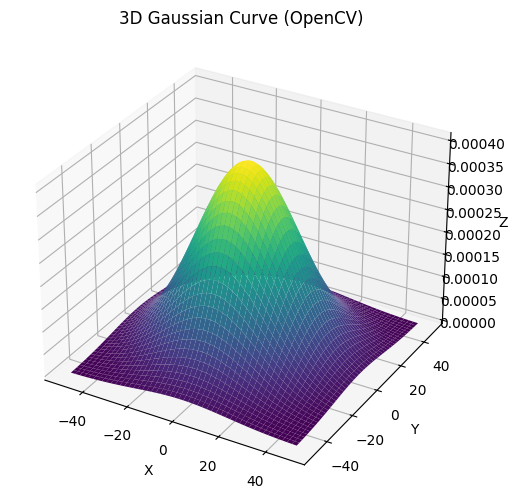

In [9]:
#Gaussian filter

import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the size and standard deviation for the kernel
size = 99  # Size of the kernel (should be odd)
sigma = 20  # Standard deviation

# Generate 1D Gaussian kernel
gaussian_1d = cv2.getGaussianKernel(size, sigma)

# Create a 2D Gaussian kernel using the outer product
gaussian_2d = gaussian_1d @ gaussian_1d.T

# Generate grid points for plotting
x = np.linspace(-size // 2, size // 2, size)
y = np.linspace(-size // 2, size // 2, size)
x, y = np.meshgrid(x, y)

# Create the plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, gaussian_2d, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_title("3D Gaussian Curve (OpenCV)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

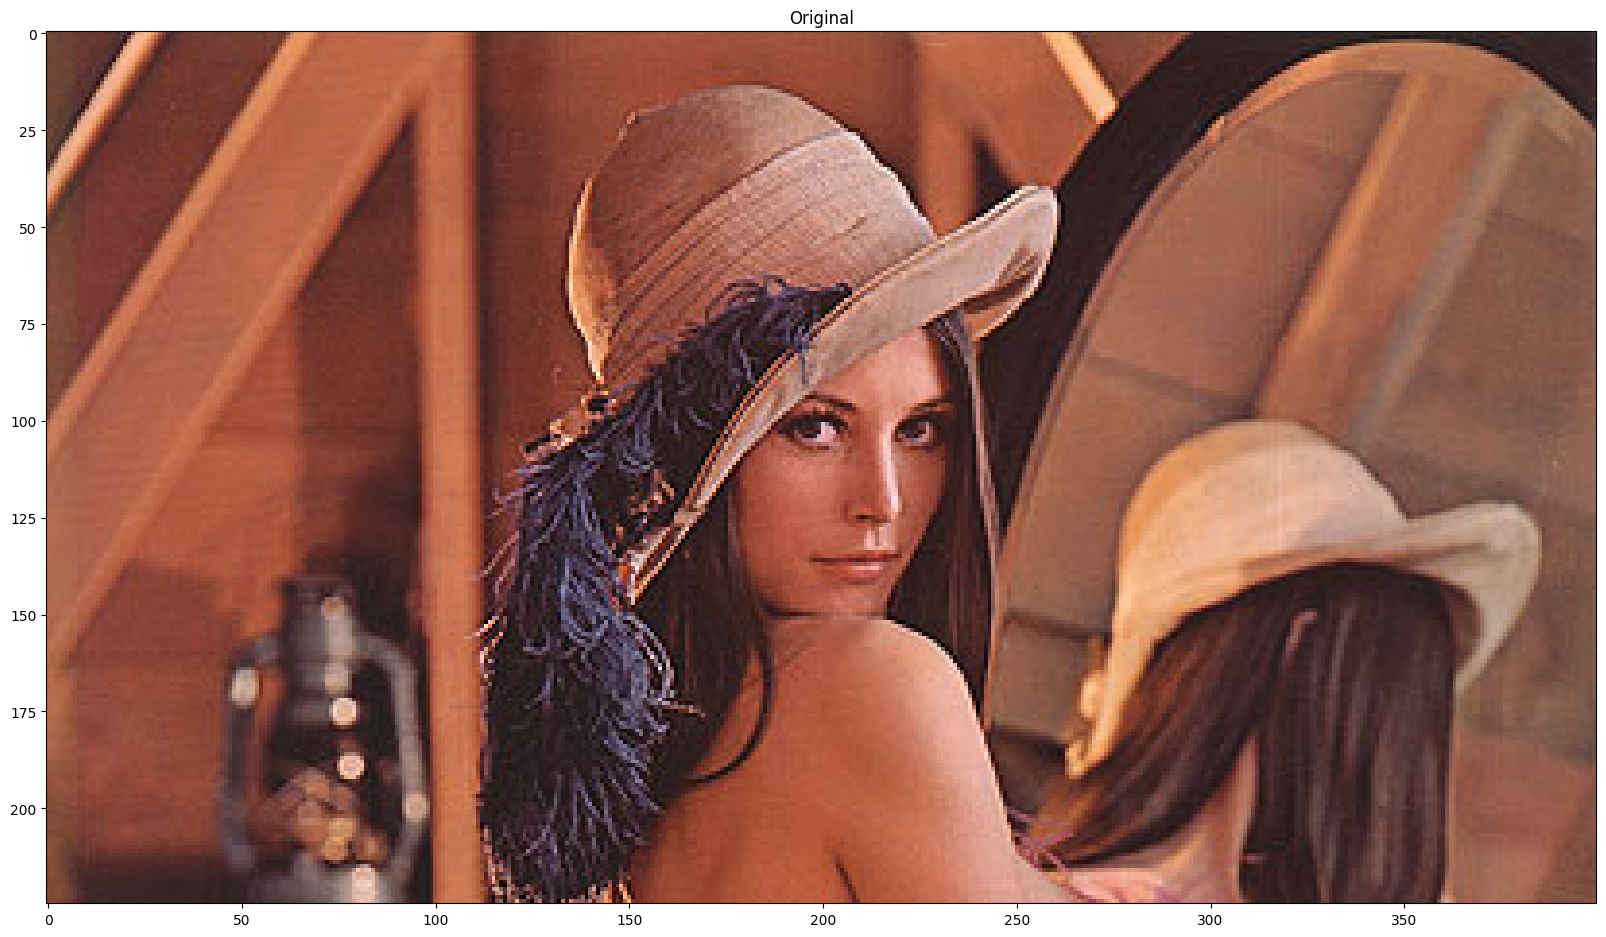

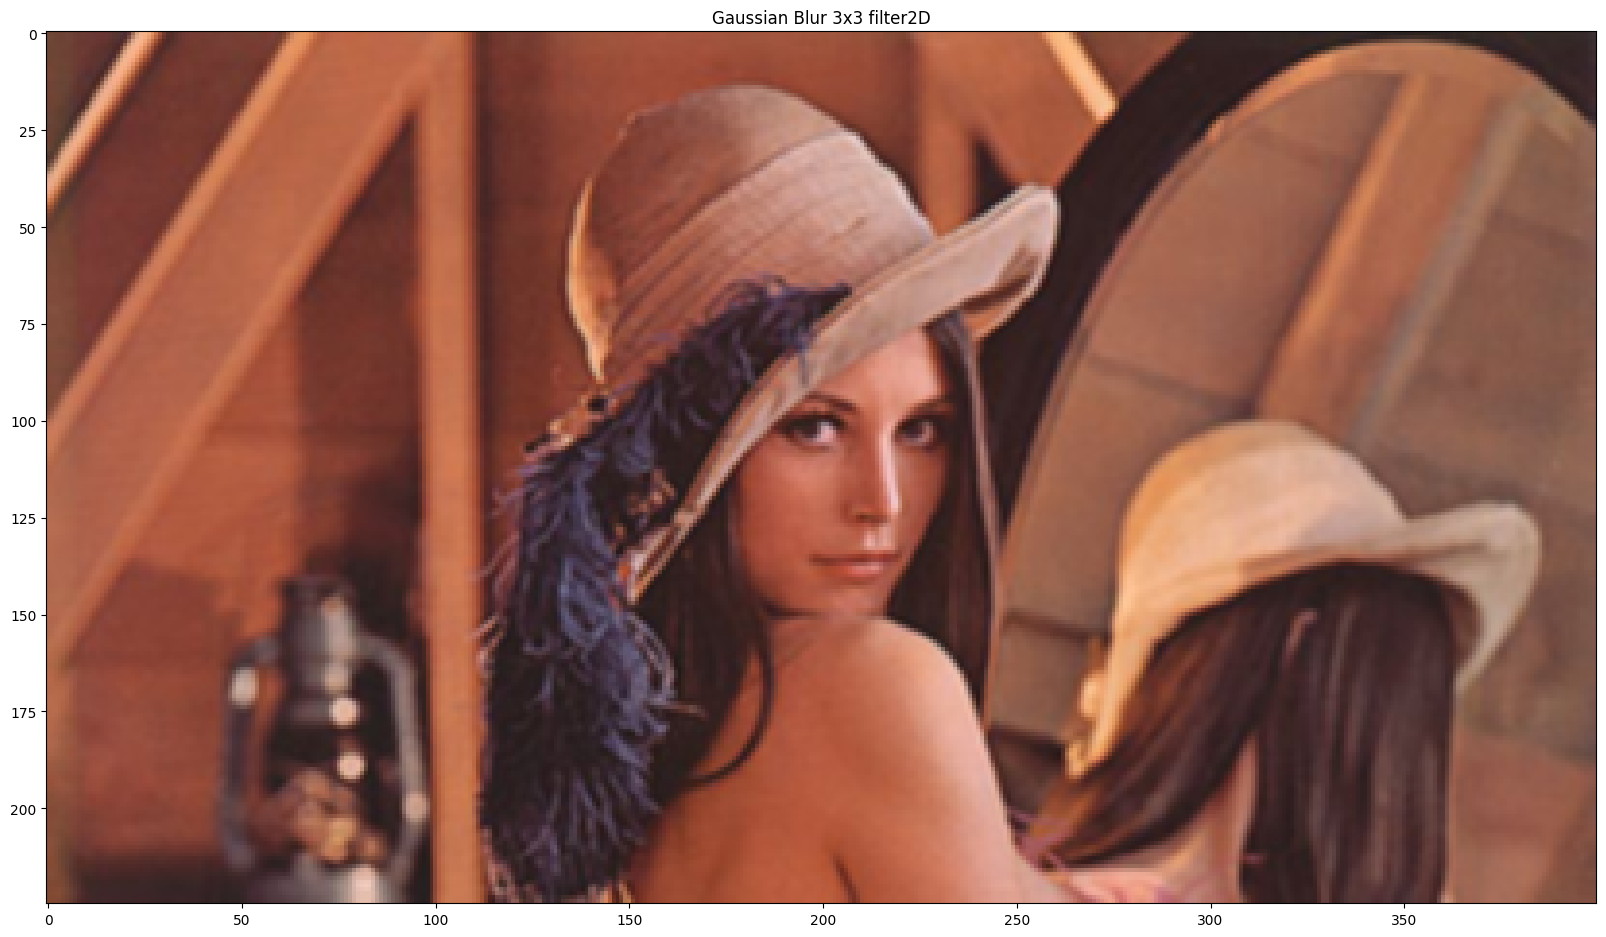

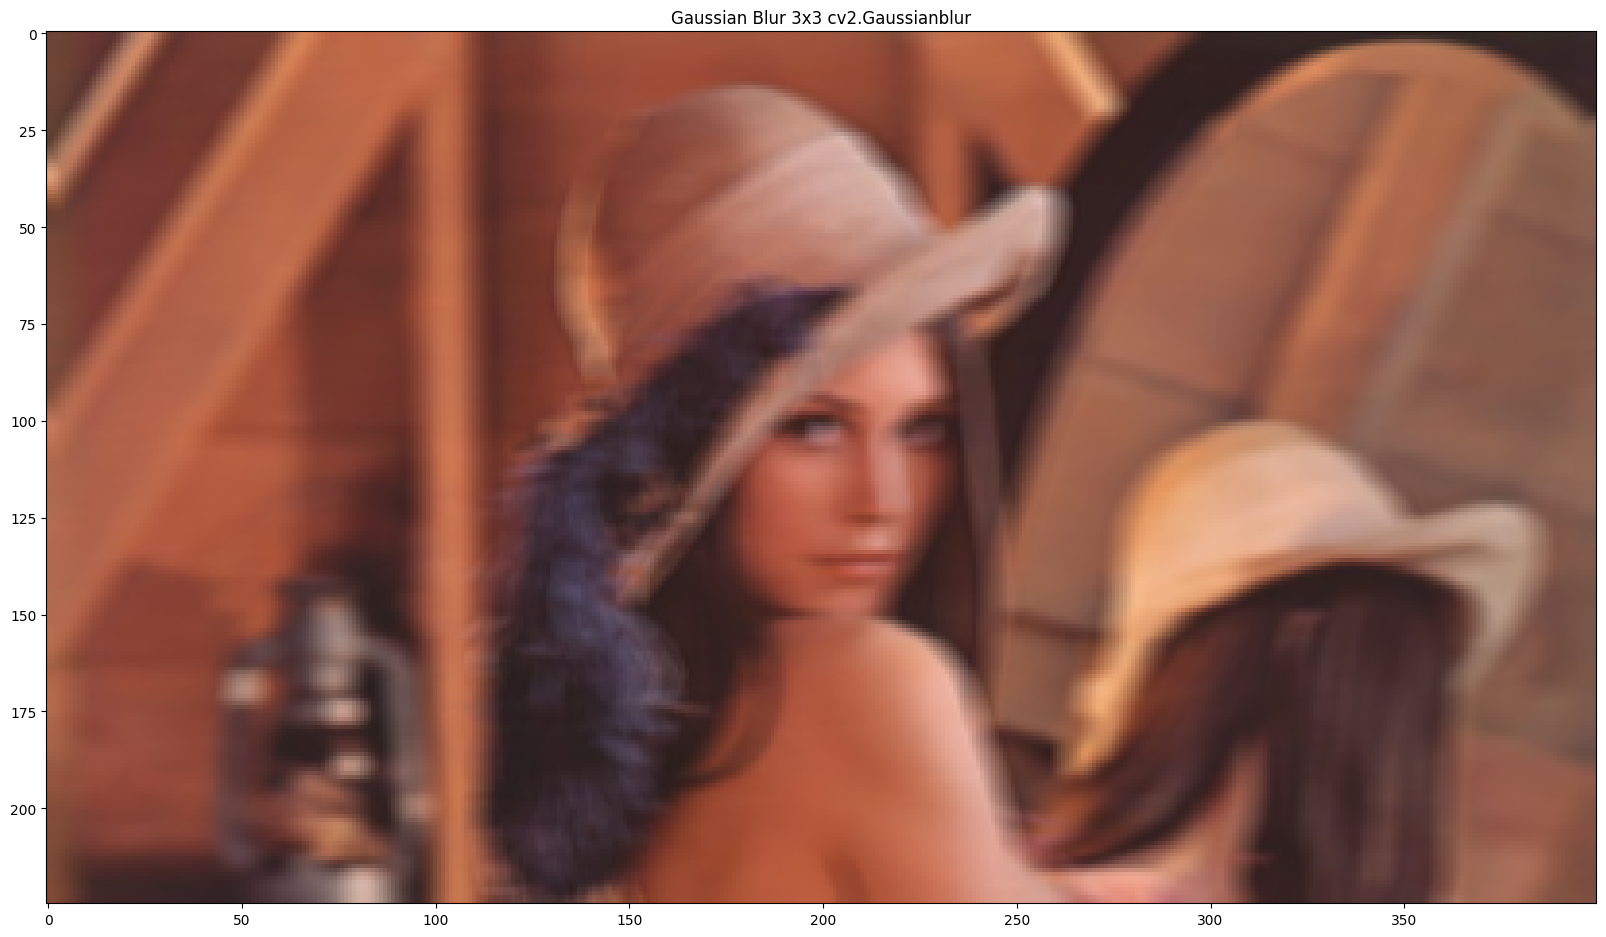

In [17]:
#Perform a gaussian blur on lena.jpg using a 3x3 gaussian kernal

import cv2
import numpy as np
from matplotlib import pyplot as plt

imgBGR = cv2.imread('images/lena.jpg')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.imshow(imgRGB)
plt.title('Original')
plt.show()

kernel = np.array([[1,2,1], [2,4,2], [1,2,1]]) / 16

dst1 = cv2.filter2D(imgRGB, -1, kernel)

plt.figure(figsize=(20,20))
plt.imshow(dst1)
plt.title('Gaussian Blur 3x3 filter2D')
plt.show()

#gaussian blur with cv2.Gaussianblur

dst2= cv2.GaussianBlur(imgRGB, ksize=(9,9), sigmaX=10, sigmaY=1)
plt.figure(figsize=(20,20))
plt.imshow(dst2)
plt.title('Gaussian Blur 3x3 cv2.Gaussianblur')
plt.show()

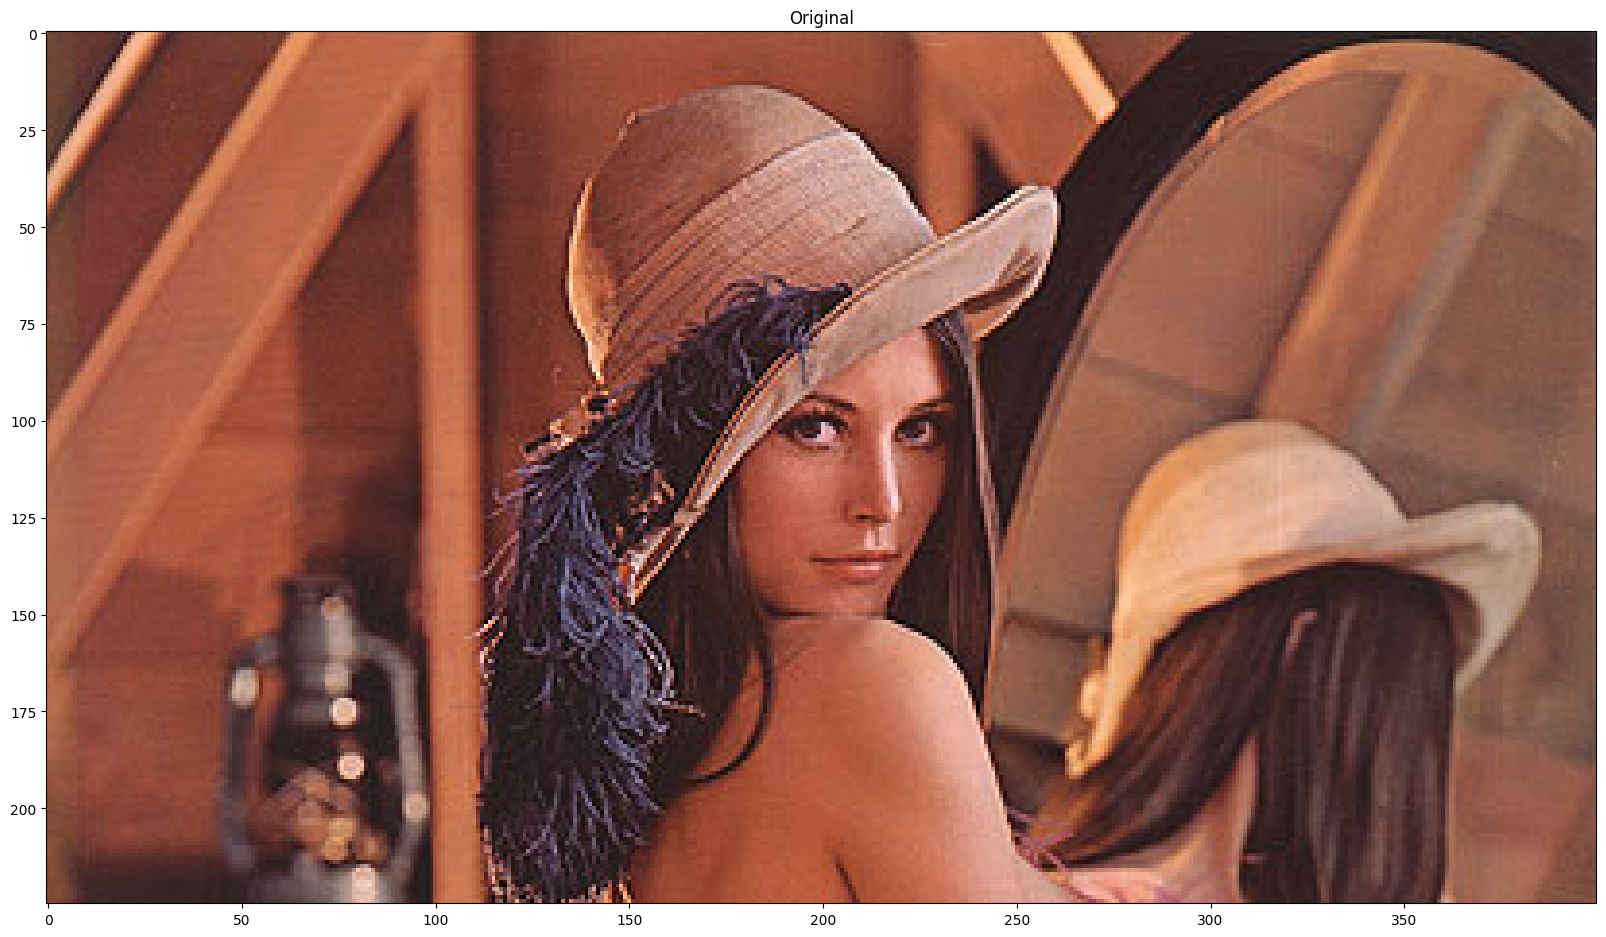

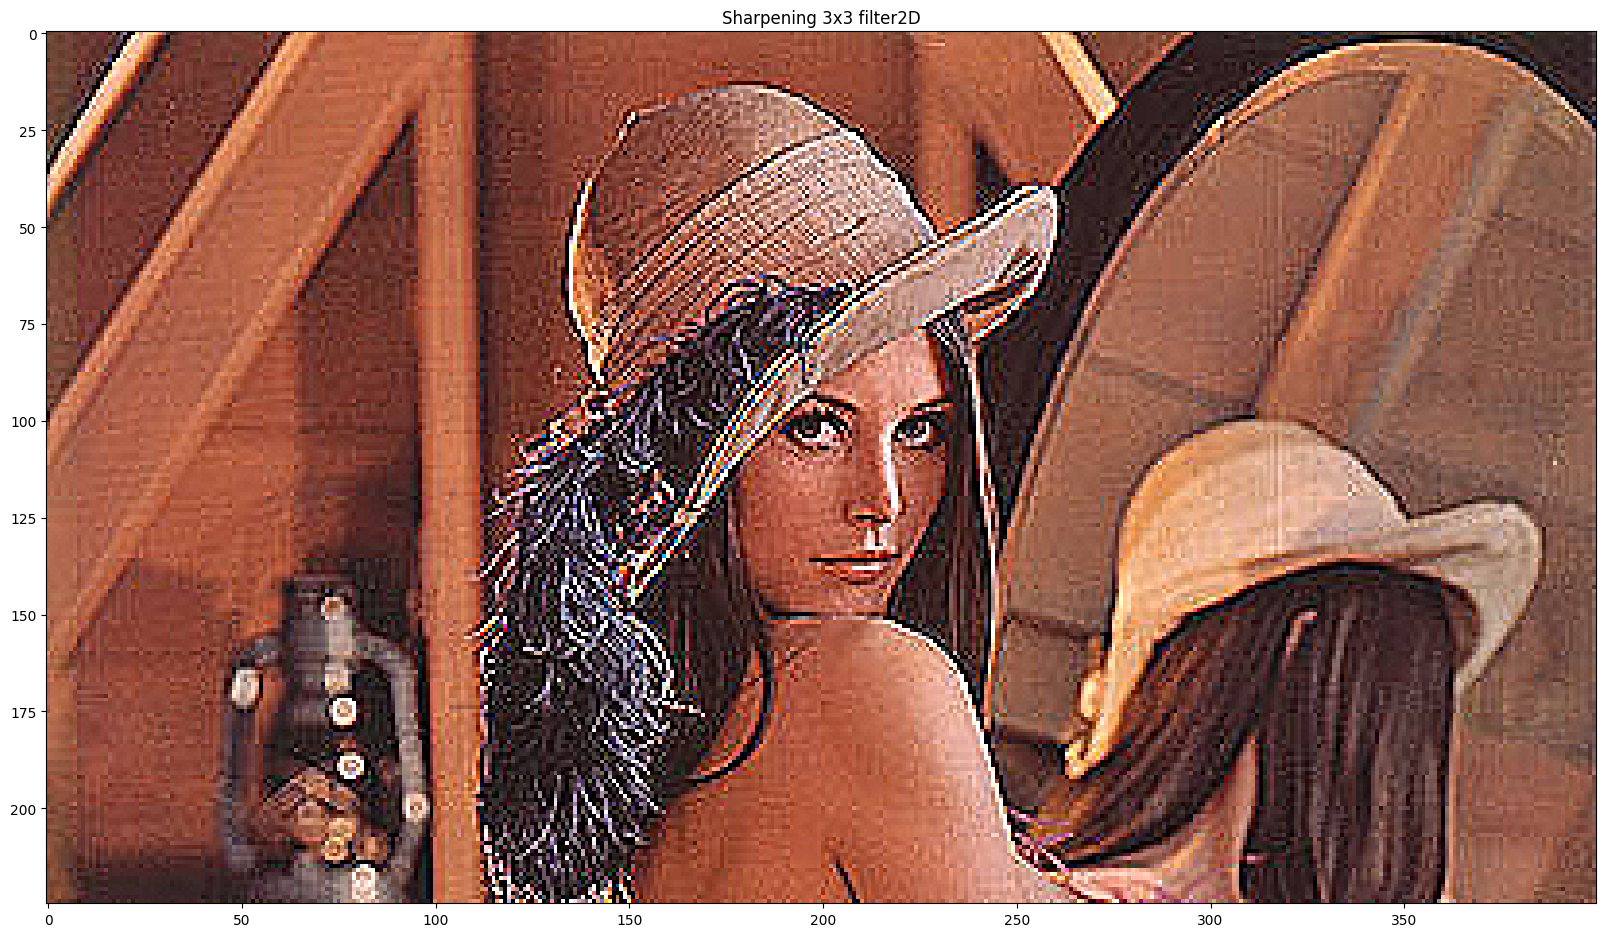

In [2]:
#HIGH PASS FILTERS - e.g. sharpening, embossing
#load lena.jpg and sharpen it using a standard 3x3 sharpening kernel

import cv2
import numpy as np
from matplotlib import pyplot as plt

imgBGR = cv2.imread('images/lena.jpg')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.imshow(imgRGB)
plt.title('Original')
plt.show()

kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]]) / 1

dst1 = cv2.filter2D(imgRGB, -1, kernel)

plt.figure(figsize=(20,20))
plt.imshow(dst1)
plt.title('Sharpening 3x3 filter2D')
plt.show()

Non-linear Filters:

Median filter - effective for salt and pepper

The principle of the median filter is to replace the gray level of each pixel by the median of the gray levels in a neighborhood of the pixels, instead of using the average operation.

Linear filtering is the filtering method in which the value of output pixel is linear combinations of the neighbouring input pixels. it can be done with convolution.For examples, mean/average filters or Gaussian filtering.
A non-linear filtering is one that cannot be done with convolution or Fourier multiplication. A sliding median filter is a simple example of a non-linear filter.


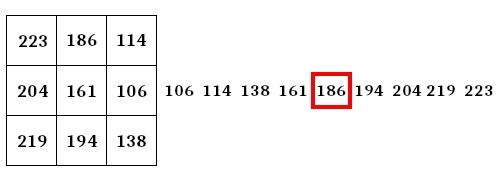

In [3]:
from IPython.display import Image
Image("median-calcul.png")

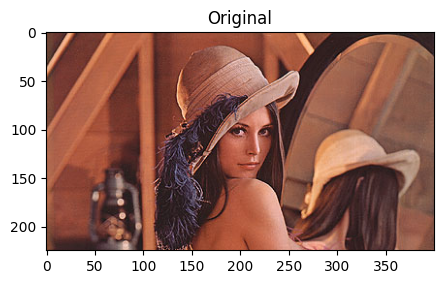

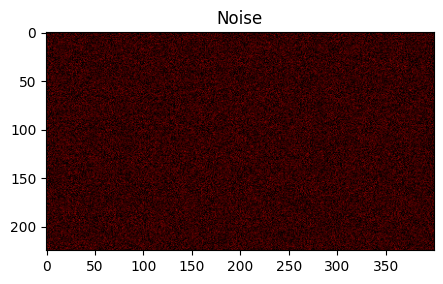

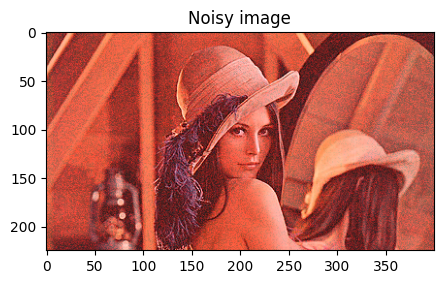

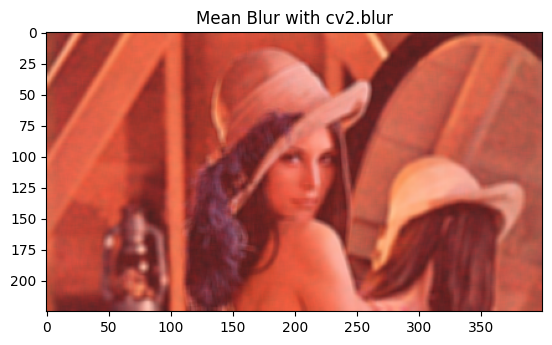

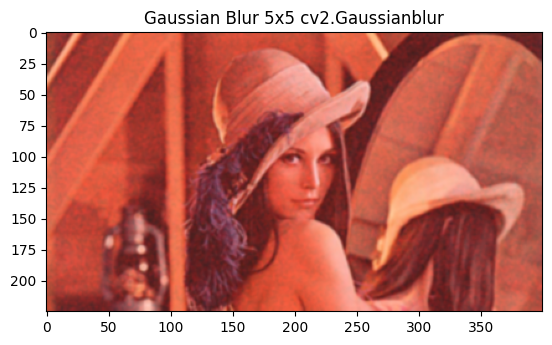

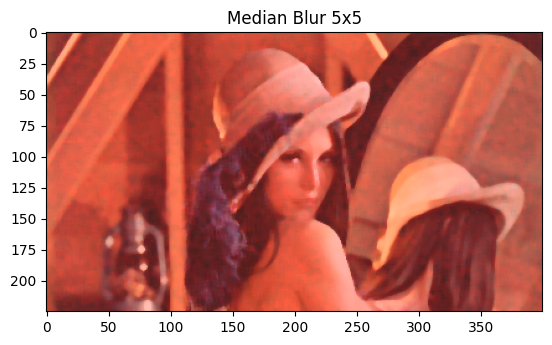

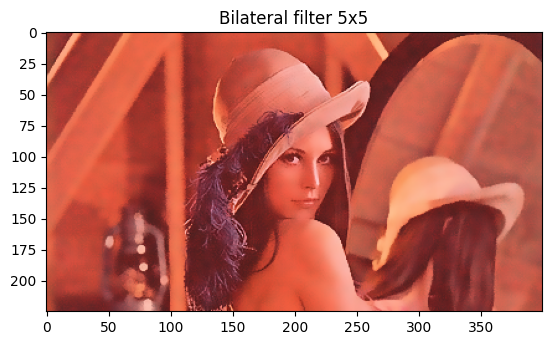

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imgBGR = cv2.imread('images/lena.jpg')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(imgRGB)
plt.title('Original')
plt.show()

noise = np.zeros(imgRGB.shape, np.uint8)
mean=50
sigma=30
cv2.randn(noise, mean, sigma)
plt.figure(figsize=(5,5))
plt.imshow(noise)
plt.title('Noise')
plt.show()

imgRGB_noisy= cv2.add(imgRGB, noise)

plt.figure(figsize=(5,5))
plt.imshow(imgRGB_noisy)
plt.title('Noisy image')
plt.show()

dst1= cv2.blur(imgRGB_noisy, (5,5))
plt.imshow(dst1)
plt.title('Mean Blur with cv2.blur')
plt.show()

dst2= cv2.GaussianBlur(imgRGB_noisy, ksize=(5,5), sigmaX=1, sigmaY=1)
plt.imshow(dst2)
plt.title('Gaussian Blur 5x5 cv2.Gaussianblur')
plt.show()

medianblur=cv2.medianBlur(imgRGB_noisy,5)
plt.imshow(medianblur)
plt.title('Median Blur 5x5')
plt.show()

bilblur = cv2.bilateralFilter(imgRGB_noisy, 9, 75, 75)
plt.imshow(bilblur)
plt.title('Bilateral filter 5x5')
plt.show()


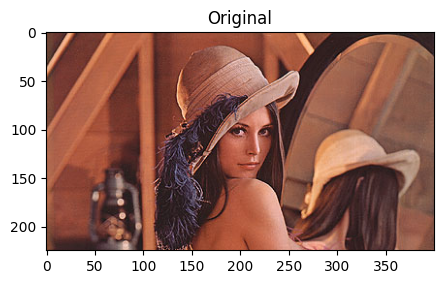

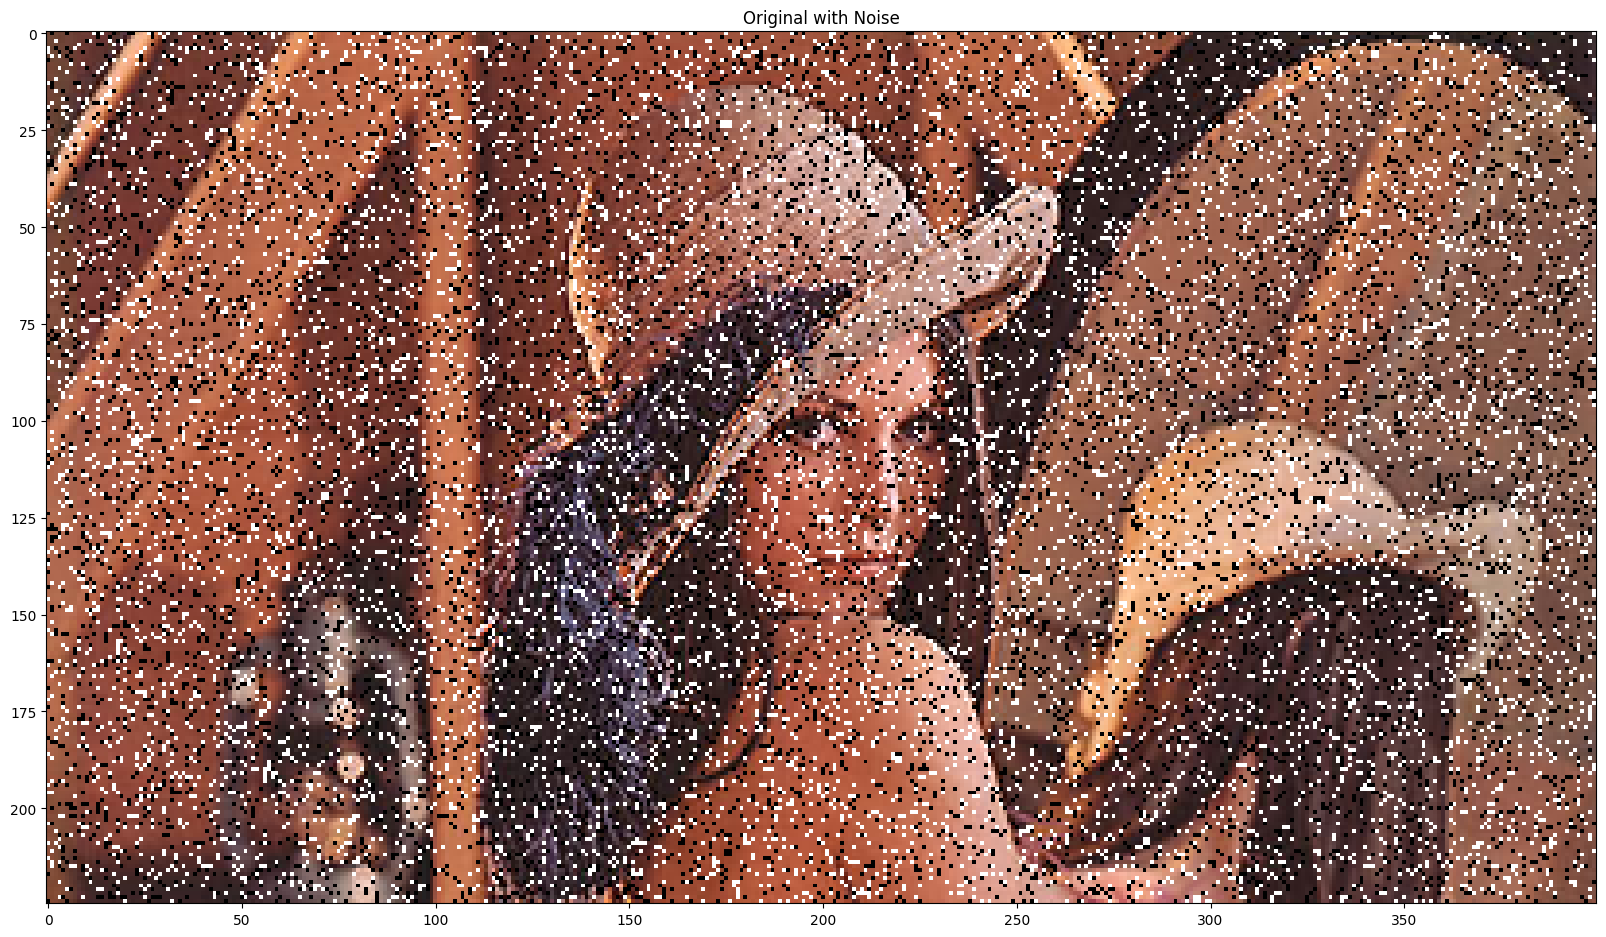

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



def addsalt_pepper(img, SNR):
    img_ = img.copy()
    c, h, w = img_.shape
    mask = np.random.choice((0, 1, 2), size=(1, h, w), p=[SNR, (1 - SNR) / 2., (1 - SNR) / 2.])
    mask = np.repeat(mask, c, axis=0)
    img_[mask == 1] = 255 # salt noise
    img_[mask == 2] = 0 #
    return img_

import cv2
import numpy as np
from matplotlib import pyplot as plt

imgBGR = cv2.imread('images/lena.jpg')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(imgRGB)
plt.title('Original')
plt.show()

#Add noise
im_noise = addsalt_pepper(imgRGB.transpose(2, 1, 0), 0.8)
im_noise = im_noise.transpose(2, 1, 0)
 # add the noise to the original image
plt.figure(figsize=(20,20))
plt.imshow(im_noise, cmap='gray')
plt.title('Original with Noise')
plt.show()




